In [2]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter


In [3]:
data_df =pd.read_csv('cleaned_data.csv')
data_df = data_df.drop(['Unnamed: 0'], axis=1)
data_df.head()

,Name,Announcement,Burial,Burial_Day,Burial_Week,Gender,Color,Size,Word_Count,No_of_Children,Significant_Children,Significant_Relatives,Fundraising,Announce_to_Burial,No_of_Relatives,County_Burial,Married
0,Eng. Paul Chemweno,2017-11-08 00:00:00,2017-11-17,0,0,1,1,55.18,179,7.0,0.0,0.0,1,9,35,37,1
1,Edith Kiende Kiogora,2017-11-08 00:00:00,2017-11-11,2,1,0,1,83.60,293,4.0,0.0,7.0,1,3,8,35,1
2,Simon Muchiri Ngigii Mbaria,2017-11-08 00:00:00,2017-11-08,6,0,1,1,109.12,206,4.0,0.0,2.0,0,0,7,30,1
3,Mwalimu Erick Namusasi Werunga,2017-11-08 00:00:00,2017-11-09,4,0,1,1,83.60,171,4.0,0.0,0.0,0,1,33,36,1
4,Maritha Mwendwa Mbui (Kaka),2017-11-08 00:00:00,2017-11-09,4,0,0,1,55.18,174,4.0,1.0,7.0,0,1,19,21,1


### Create a Kaplan-meier survival curve

I will use a lifetime of the period from when the death announcement is made to the time a person is buried: <br>
Birth event:  Announcement made<br>
Death event:  buried <br>





In [4]:
dropped=data_df[data_df['Announce_to_Burial']>90]
dropped_=dropped.index
data_df=data_df.drop(dropped_)

In [5]:
dropped=data_df[data_df['Announce_to_Burial']<0]
dropped_=dropped.index
data_df=data_df.drop(dropped_) 

In [65]:
data_df.shape

(831, 17)

In [6]:
km = KaplanMeierFitter()
T= data_df['Announce_to_Burial']
C= data_df['Fundraising']
km.fit(T,C)
T.unique()

array([ 9,  3,  0,  1,  2,  4,  8,  5,  7, 12, 32, 10,  6, 19, 13, 16, 11,
       15, 14, 18, 20, 23, 30, 33])

Populating the interactive namespace from numpy and matplotlib


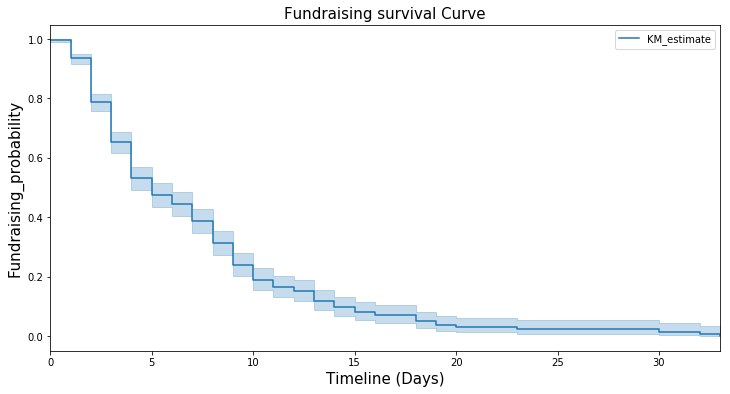

In [12]:
%pylab inline
figsize(12,6)
km.plot()
plt.title("Fundraising survival Curve", fontsize = 15)
plt.ylabel("Fundraising_probability", fontsize = 15)
plt.xlabel('Timeline (Days)', fontsize = 15);


Populating the interactive namespace from numpy and matplotlib


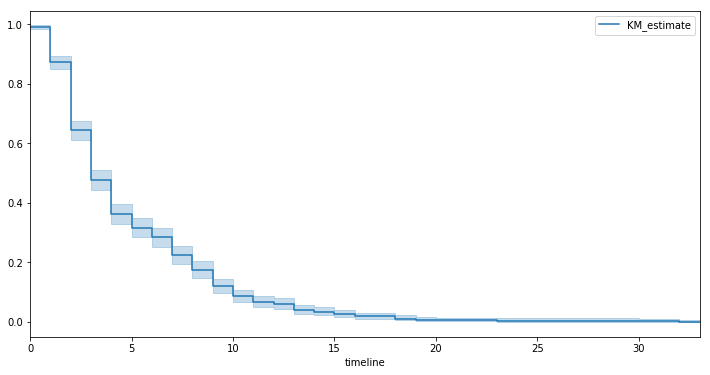

In [68]:
C1= data_df['Color']
km.fit(T,C1)
%pylab inline
figsize(12,6)
km.plot()